# OCR 비교

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?  
기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부를 기술하였다.  
  
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?  
앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고, 평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명하였다.  
  
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?  
최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.  

In [1]:
import os
import glob

In [2]:
os.getcwd()

'/aiffel/aiffel'

In [3]:
path=os.getenv('HOME')+'/aiffel/ocr_image/*'
file_list= glob.glob(path)
file_list

['/aiffel/aiffel/ocr_image/sh3.png',
 '/aiffel/aiffel/ocr_image/the_flying.jpg',
 '/aiffel/aiffel/ocr_image/hw.jpg',
 '/aiffel/aiffel/ocr_image/hg.jpg',
 '/aiffel/aiffel/ocr_image/td.jpg',
 '/aiffel/aiffel/ocr_image/sh6.png',
 '/aiffel/aiffel/ocr_image/sh4.png',
 '/aiffel/aiffel/ocr_image/sh1.png',
 '/aiffel/aiffel/ocr_image/sh2.png',
 '/aiffel/aiffel/ocr_image/tp.jpg',
 '/aiffel/aiffel/ocr_image/word-cloud-913314_1280.png']

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [ keras_ocr.tools.read(file_name) for file_name in file_list]
prediction_groups = [pipeline.recognize([file_name]) for file_name in file_list]

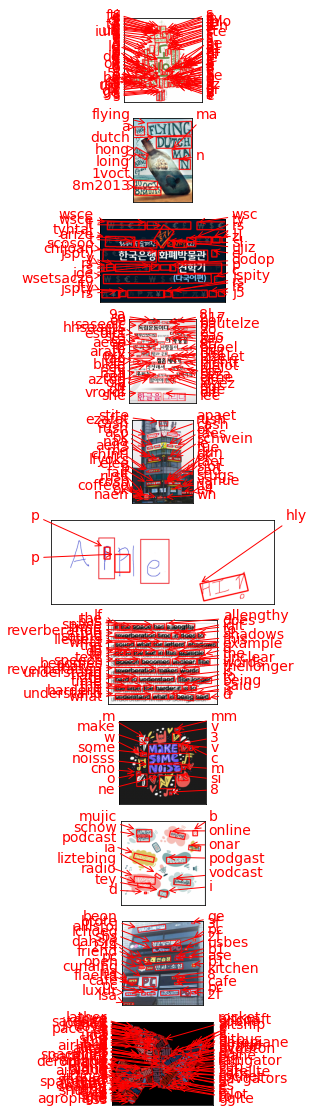

In [6]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)